In [9]:
import matplotlib.pyplot as plt

class Fuzzy:
    def __init__(self, a, b, c=None):
        self.a = a
        self.b = b
        self.c = c

    def down(self, x):
        if x <= self.a:
            return 1
        elif x >= self.b:
            return 0
        else:
            return (self.b - x) / (self.b - self.a)

    def up(self, x):
        if x <= self.a:
            return 0
        elif x >= self.b:
            return 1
        else:
            return (x - self.a) / (self.b - self.a)

    def triangle(self, x):
        if self.a <= x <= self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b < x <= self.c:
            return (self.c - x) / (self.c - self.b)
        return 0

class Demand:
    def __init__(self):
        self.turun = Fuzzy(1000, 3000)
        self.tetap = Fuzzy(2000, 4000)
        self.naik = Fuzzy(3000, 5000)

    def turun_val(self, x): return self.turun.down(x)
    def tetap_val(self, x): return self.tetap.triangle(x)
    def naik_val(self, x): return self.naik.up(x)

class Stock:
    def __init__(self):
        self.sedikit = Fuzzy(0, 200)
        self.sedang = Fuzzy(200, 600)
        self.banyak = Fuzzy(400, 1000)

    def sedikit_val(self, x): return self.sedikit.down(x)
    def sedang_val(self, x): return self.sedang.triangle(x)
    def banyak_val(self, x): return self.banyak.up(x)

class Production:
    def __init__(self):
        self.berkurang = Fuzzy(2000, 5000)
        self.bertambah = Fuzzy(4000, 7000)

    def berkurang_val(self, membership):
        return self.berkurang.a + membership * (self.berkurang.b - self.berkurang.a)

    def bertambah_val(self, membership):
        return self.bertambah.a + membership * (self.bertambah.b - self.bertambah.a)

def fuzzy_inference(demand_value, stock_value):
    demand = Demand()
    stock = Stock()
    production = Production()

    # Hitung derajat keanggotaan fuzzy
    turun = demand.turun_val(demand_value)
    tetap = demand.tetap_val(demand_value)
    naik = demand.naik_val(demand_value)

    sedikit = stock.sedikit_val(stock_value)
    sedang = stock.sedang_val(stock_value)
    banyak = stock.banyak_val(stock_value)

    print("\nDerajat Keanggotaan:")
    print(f"Permintaan: Turun={turun:.2f}, Tetap={tetap:.2f}, Naik={naik:.2f}")
    print(f"Persediaan: Sedikit={sedikit:.2f}, Sedang={sedang:.2f}, Banyak={banyak:.2f}")

    # Aturan fuzzy
    rules = [
        (min(turun, sedikit), "bertambah"),
        (min(turun, sedang), "berkurang"),
        (min(turun, banyak), "berkurang"),
        (min(tetap, sedikit), "bertambah"),
        (min(tetap, sedang), "bertambah"),
        (min(tetap, banyak), "berkurang"),
        (min(naik, sedikit), "bertambah"),
        (min(naik, sedang), "bertambah"),
        (min(naik, banyak), "berkurang")
    ]

    # Defuzzifikasi
    numerator = 0
    denominator = 0

    print("\nDetail Aturan Fuzzy:")
    for strength, action in rules:
        if action == "bertambah":
            crisp_value = production.bertambah_val(strength)
        else:
            crisp_value = production.berkurang_val(strength)

        print(f"Rule: {action.capitalize()}, Strength={strength:.2f}, Output={crisp_value:.2f}")
        numerator += strength * crisp_value
        denominator += strength

    if denominator == 0:
        return 0

    return numerator / denominator

# Input
demand_input = 4000
stock_input = 300

# Hasil
result = fuzzy_inference(demand_input, stock_input)
print(f"\nNilai Produksi yang Disarankan: {result:.2f}")



Derajat Keanggotaan:
Permintaan: Turun=0.00, Tetap=1.00, Naik=0.50
Persediaan: Sedikit=0.00, Sedang=0.25, Banyak=0.00

Detail Aturan Fuzzy:
Rule: Bertambah, Strength=0.00, Output=4000.00
Rule: Berkurang, Strength=0.00, Output=2000.00
Rule: Berkurang, Strength=0.00, Output=2000.00
Rule: Bertambah, Strength=0.00, Output=4000.00
Rule: Bertambah, Strength=0.25, Output=4750.00
Rule: Berkurang, Strength=0.00, Output=2000.00
Rule: Bertambah, Strength=0.00, Output=4000.00
Rule: Bertambah, Strength=0.25, Output=4750.00
Rule: Berkurang, Strength=0.00, Output=2000.00

Nilai Produksi yang Disarankan: 4750.00


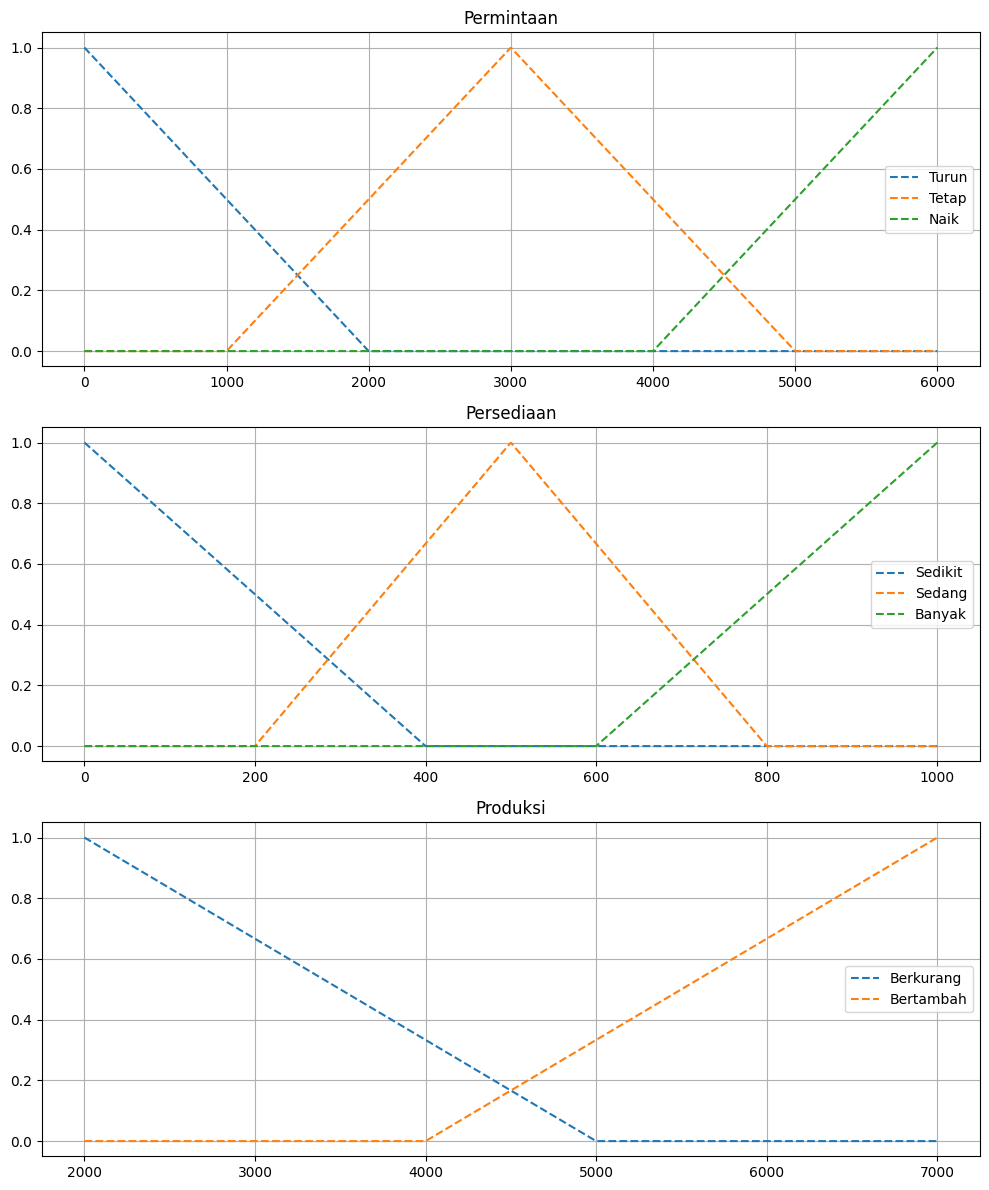

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk Fuzzy Membership
class Fuzzy:
    def __init__(self, a, b, c=None):
        self.a = a
        self.b = b
        self.c = c

    def turun(self, x):
        return np.maximum(0, np.minimum((self.b - x) / (self.b - self.a), 1))

    def naik(self, x):
        return np.maximum(0, np.minimum((x - self.a) / (self.b - self.a), 1))

    def tetap(self, x):
        return np.maximum(0, np.minimum((x - self.a) / (self.b - self.a), (self.c - x) / (self.c - self.b)))


# Variabel Fuzzy
demand = Fuzzy(0, 2000)  # turun
demand.tetap = lambda x: Fuzzy(1000, 3000, 5000).tetap(x)  # tetap
demand.naik = lambda x: Fuzzy(4000, 6000).naik(x)  # naik

stock = Fuzzy(0, 400)  # sedikit
stock.sedang = lambda x: Fuzzy(200, 500, 800).tetap(x)  # sedang
stock.banyak = lambda x: Fuzzy(600, 1000).naik(x)  # banyak

prod = Fuzzy(2000, 5000)  # berkurang
prod.bertambah = lambda x: Fuzzy(4000, 7000).naik(x)  # bertambah

# Range x untuk grafik
x_demand = np.linspace(0, 6000, 1000)
x_stock = np.linspace(0, 1000, 1000)
x_prod = np.linspace(2000, 7000, 1000)

# Plot dalam satu figure dengan 3 subplot
plt.figure(figsize=(10, 12))

# Plot Permintaan
plt.subplot(3, 1, 1)
plt.plot(x_demand, [demand.turun(x) for x in x_demand], label="Turun", linestyle="--")
plt.plot(x_demand, [demand.tetap(x) for x in x_demand], label="Tetap", linestyle="--")
plt.plot(x_demand, [demand.naik(x) for x in x_demand], label="Naik", linestyle="--")
plt.title("Permintaan")
plt.legend()
plt.grid()

# Plot Persediaan
plt.subplot(3, 1, 2)
plt.plot(x_stock, [stock.turun(x) for x in x_stock], label="Sedikit", linestyle="--")
plt.plot(x_stock, [stock.sedang(x) for x in x_stock], label="Sedang", linestyle="--")
plt.plot(x_stock, [stock.banyak(x) for x in x_stock], label="Banyak", linestyle="--")
plt.title("Persediaan")
plt.legend()
plt.grid()

# Plot Produksi
plt.subplot(3, 1, 3)
plt.plot(x_prod, [prod.turun(x) for x in x_prod], label="Berkurang", linestyle="--")
plt.plot(x_prod, [prod.bertambah(x) for x in x_prod], label="Bertambah", linestyle="--")
plt.title("Produksi")
plt.legend()
plt.grid()

# Tampilkan semua grafik
plt.tight_layout()
plt.show()
